In [1]:
library(rpart)
install.packages('rpart.plot', repos='http://cran.us.r-project.org')
library(rpart.plot)
install.packages('SDMTools', repos='http://cran.us.r-project.org')
library(SDMTools)

package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\net70\AppData\Local\Temp\RtmpslAN5w\downloaded_packages


Warning message:
"package 'rpart.plot' was built under R version 3.3.3"

package 'SDMTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\net70\AppData\Local\Temp\RtmpslAN5w\downloaded_packages


Warning message:
"package 'SDMTools' was built under R version 3.3.3"

<img src="Decision_Tree_Features.png">

In [2]:
myData = read.csv("loan.csv")
head(myData)

age,ed_new,employ,address,income,debtinc,creddebt,othdebt,Rloan
41,2,17,12,176,9.3,11.359392,5.008608,0
27,1,10,6,31,17.3,1.362202,4.000798,1
40,1,15,14,55,5.5,0.856075,2.168925,1
41,1,15,14,120,2.9,2.658720,0.821280,1
24,1,2,0,28,17.3,1.787436,3.056564,0
41,1,5,5,25,10.2,0.392700,2.157300,1


In [3]:
myData[,9] = factor(myData[,9], labels= c("no", "yes"))
myData[,2] = factor(myData[,2])

In [4]:
head(myData)

age,ed_new,employ,address,income,debtinc,creddebt,othdebt,Rloan
41,2,17,12,176,9.3,11.359392,5.008608,no
27,1,10,6,31,17.3,1.362202,4.000798,yes
40,1,15,14,55,5.5,0.856075,2.168925,yes
41,1,15,14,120,2.9,2.658720,0.821280,yes
24,1,2,0,28,17.3,1.787436,3.056564,no
41,1,5,5,25,10.2,0.392700,2.157300,yes


In [5]:
set.seed(1234)

In [6]:
myData$sampling = runif(nrow(myData)) 

In [7]:
test_set = subset(myData, myData$sampling <= 0.3)
test_set = test_set[, !names(trainingSet) %in% c("sampling")]
train_set = subset(myData, myData$sampling > 0.3)
train_set = train_set[, !names(trainingSet) %in% c("sampling")]

In [8]:
tree = rpart(Rloan~., train_set, method="class", control=rpart.control(minsplit=50))
tree

n= 509 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 509 132 yes (0.25933202 0.74066798)  
   2) debtinc>=14.75 119  51 no (0.57142857 0.42857143)  
     4) debtinc>=24.65 21   2 no (0.90476190 0.09523810) *
     5) debtinc< 24.65 98  49 no (0.50000000 0.50000000)  
      10) employ< 6.5 53  17 no (0.67924528 0.32075472) *
      11) employ>=6.5 45  13 yes (0.28888889 0.71111111) *
   3) debtinc< 14.75 390  64 yes (0.16410256 0.83589744)  
     6) employ< 4.5 128  50 yes (0.39062500 0.60937500)  
      12) address< 6.5 86  42 yes (0.48837209 0.51162791)  
        24) creddebt>=0.270204 54  21 no (0.61111111 0.38888889) *
        25) creddebt< 0.270204 32   9 yes (0.28125000 0.71875000) *
      13) address>=6.5 42   8 yes (0.19047619 0.80952381) *
     7) employ>=4.5 262  14 yes (0.05343511 0.94656489) *

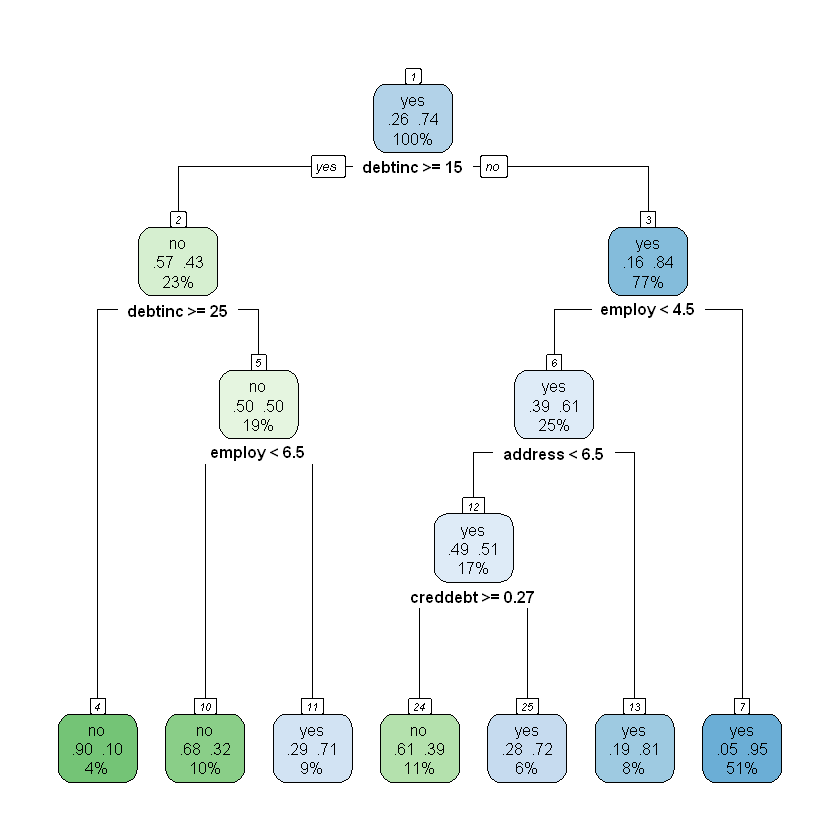

In [9]:
rpart.plot(tree, type = 2,extra=104,cex=0.8, box.palette="GnBu",nn=TRUE)

1) Tree has 7 Treminal nodeswith 6 layres<br>
2) The tree independent variables - debtinc, employ, address, creddebt. best predictor is debtinc.<br>
3) Let's imagine someone named Yossi. Yossi is 30 years old, his debtinc=10, employed 4 years at the same place with 40k$     income, lives in his current address for 6 years with a creddebt of 0.3 . How would our Tree Classify him?
Seems Yossi is classified as someone who would'nt be able to return his loan.

In [10]:
predTrain = predict(tree, train_set, type="class")
train_set$prediction = factor(predTrain, labels=c("no", "yes"))

In [11]:
cmatTrain = table(truth=train_set$Rloan, pred=train_set$prediction)
addmargins(cmatTrain)
cmatTrain

,no,yes,Sum
no,88,44,132
yes,40,337,377
Sum,128,381,509


     pred
truth  no yes
  no   88  44
  yes  40 337

In [12]:
Accuracy = (cmatTrain[1,1] + cmatTrain[2,2])/sum(cmatTrain)
Precision = cmatTrain[2,2] / (cmatTrain[2,2]+cmatTrain[1,2])
Sensitivity = cmatTrain[2,2] / (cmatTrain[2,2]+cmatTrain[2,1])
Specificity = cmatTrain[1,1] / (cmatTrain[1,1]+cmatTrain[1,2])

Accuracy is the ratio of correct predictions, (both positive and negative) to all predictions.

In [13]:
Accuracy

[1] 0.8349705

Precision (positive predictive value) measures the accuracy of the classifier, when it predicts an example to be positive (True Positive).

In [14]:
Precision

[1] 0.8845144

Sensitivity is the ratio of all the correctly predicted positive examples (True Positive) to all the positive examples in the data

In [15]:
Sensitivity

[1] 0.8938992

Specificity measures the true negative rate: the proportion of negatives that are correctly identified.

In [16]:
Specificity

[1] 0.6666667

In [17]:
predTest = predict(tree, test_set, type="class")
test_set$prediction = factor(predTest, labels=c("no", "yes"))

In [18]:
cmatTest = table(truth=test_set$Rloan, pred=test_set$prediction)
addmargins(cmatTest)
cmatTest

,no,yes,Sum
no,20,31,51
yes,24,116,140
Sum,44,147,191


     pred
truth  no yes
  no   20  31
  yes  24 116

In [19]:
Accuracy = (cmatTest[1,1] + cmatTest[2,2])/sum(cmatTest)
Precision = cmatTest[2,2] / (cmatTest[2,2]+cmatTest[1,2])
Sensitivity = cmatTest[2,2] / (cmatTest[2,2]+cmatTest[2,1])
Specificity = cmatTest[1,1] / (cmatTest[1,1]+cmatTest[1,2])

In [20]:
Accuracy

[1] 0.7120419

In [21]:
Precision

[1] 0.7891156

In [22]:
Sensitivity

[1] 0.8285714

In [23]:
Specificity

[1] 0.3921569

Seems that our model has a 70%-80% efficiancy of prediction, which is not the best. Its weak spot is the abillity to accuratly identify False Positives.